In [5]:
import requests 
from bs4 import BeautifulSoup 
import openpyxl
from IPython.display import Image # 이미지 불러오기

In [11]:
wb = openpyxl.Workbook() 
sheet = wb.active
sheet.append(["제목", "채널명", "조회수", "좋아요수"])

In [1]:
!pip install IPython

In [15]:
raw = requests.get("https://tv.naver.com/r") 
html = BeautifulSoup(raw.text, 'html.parser')
# div.inner : top 1~3의 각 제목,채널,조회수,좋아요수를 포괄 (하단 사진 참고)
container = html.select("div.inner") # top 1~3
# div.cds : rank 4~*의 제목,채널,조회수,좋아요수 모두 포괄
container2 = html.select("div.cds") # 4 ~ *

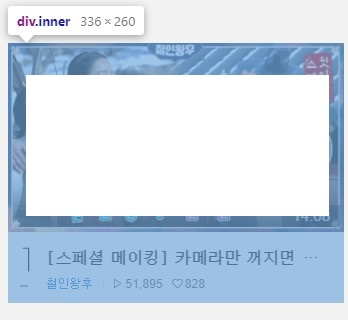

In [7]:
Image("img\K-241.jpg")

In [16]:
# rank top 1~3
for con in container:
    t = con.select_one("strong.tit").text.strip() #제목 
    c = con.select_one("dd.chn").text.strip() #채널 
    h = con.select_one("span.hit").text.strip() #조회수 
    l = con.select_one("span.like").text.strip() #좋아요수 
    
    # sheet 내 각 행에 데이터 추가 
    sheet.append([t, c, h, l])

# rank 4 ~ *
for con in container2 :
    t = con.select_one("dt.title").text.strip() #제목 
    c = con.select_one("dd.chn").text.strip() #채널 
    h = con.select_one("span.hit").text.strip() #조회수 
    l = con.select_one("span.like").text.strip() #좋아요수 
    
    # sheet 내 각 행에 데이터 추가 
    sheet.append([t, c, h, l])

wb.save('naver_tv.xlsx')